In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid')

Целевая переменная: 

* `price` - цена

Признаки: 

* `dateCrawled` - дата, когда объявление было впервые просмотрено
* `name` - название автомобиля
* `seller` - тип продавца
* `offerType` - тип предложения
* `abtest` - тип теста
* `vehicleType` — тип автомобильного кузова
* `yearOfRegistration` - год регистрации
* `gearbox` — тип коробки передач
* `powerPS` — мощность (л. с.)
* `model` — модель автомобиля
* `kilometer` — пробег (км)
* `monthOfRegistration` - месяц регистрации автомобиля
* `fuelType` — тип топлива
* `brand` — марка автомобиля
* `notRepairedDamage` - была машина в ремонте или нет
* `dateCreated` - дата создания объявления
* `nrOfPictures` - количество фотографий
* `postalCode` — почтовый индекс владельца объявления 
* `lastSeen` — дата последней активности пользователя

In [2]:
df = pd.read_csv('autos.csv').drop('index', axis=1)
df.head(2)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50


# 1. EDA and Data Preprocesing

In [3]:
df.shape

(371528, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [5]:
# Количество дубликатов
duplicates_count = df.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates_count}")

df.drop_duplicates(inplace=True)


Количество дубликатов: 4


In [6]:
df.isna().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [7]:
# В процентах 

percentage_of_missing = round(df.isna().sum().sort_values(ascending=False) * 100 / len(df), 2)
percentage_of_missing

notRepairedDamage      19.40
vehicleType            10.19
fuelType                8.99
model                   5.51
gearbox                 5.44
seller                  0.00
name                    0.00
dateCrawled             0.00
offerType               0.00
abtest                  0.00
yearOfRegistration      0.00
price                   0.00
kilometer               0.00
powerPS                 0.00
monthOfRegistration     0.00
brand                   0.00
dateCreated             0.00
nrOfPictures            0.00
postalCode              0.00
lastSeen                0.00
dtype: float64

In [8]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715240e+05,371524.000000,371524.000000,371524.000000,371524.000000,371524.0,371524.00000
mean,1.729530e+04,2004.578033,115.549039,125618.842928,5.734451,0.0,50820.49427
std,3.587973e+06,92.867097,192.140488,40112.138811,3.712423,0.0,25799.08841
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [9]:
df.name.nunique()

233531

In [10]:
df.seller.value_counts()

seller
privat        371521
gewerblich         3
Name: count, dtype: int64

In [11]:
df.offerType.value_counts()

offerType
Angebot    371512
Gesuch         12
Name: count, dtype: int64

##### Удалим неинформативные признаки, а именно: 
- `dateCrawled` - дата, когда объявление было впервые просмотрено (не влияет на цену)
- `dateCreated` — дата создания анкеты (не так важно для предсказания цен)
- `monthOfRegistration` - месяц регистрации автомобиля (большее значение имеет год регистрации)
- `postalCode` — почтовый индекс владельца анкеты (не важно для предсказания цен)
- `lastSeen` — дата последней активности пользователя (не важно для предсказания цен)
- `offerType` - сильная разница между численностью категорий, столбец бесполезен
- `seller` - аналогичная ситуация, столбец бесполезен
- `name` - сырой текст, столбец содержит неинтерпретируемую информацию
- `nrOfPictures` - количество фотографий, весь столбец заполнен 0 


In [12]:
df.drop(['dateCrawled', 'dateCreated', 'monthOfRegistration', 'postalCode', 'lastSeen', 'offerType', 'seller', 'name', 'nrOfPictures'], axis=1, inplace=True)

In [13]:
df.isna().sum()

price                     0
abtest                    0
vehicleType           37869
yearOfRegistration        0
gearbox               20209
powerPS                   0
model                 20484
kilometer                 0
fuelType              33386
brand                     0
notRepairedDamage     72060
dtype: int64

In [14]:
# Создадим новые переменные - индикаторы пропусков по отдельным столбцам
df['vehicleMissed'] = df.vehicleType.isna()
df['gearboxMissed'] = df.gearbox.isna()
# df['modelMissed'] = df.model.isna()
df['fuelMissed'] = df.fuelType.isna()
# df['repairMissed'] = df.notRepairedDamage.isna()
df.sample(3)

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,vehicleMissed,gearboxMissed,fuelMissed
192702,3500,control,kleinwagen,2003,NaN,75,golf,150000,benzin,volkswagen,nein,False,True,False
41315,6990,test,limousine,2004,manuell,170,5er,150000,benzin,bmw,nein,False,False,False
199157,13300,test,kombi,2011,automatik,156,c_klasse,100000,benzin,mercedes_benz,ja,False,False,False


In [15]:
# Замена пропущенных значений (самыми частыми)
# Пропущенные значения в model и notRepairedDamage заменяются на unknown
most_common = df["vehicleType"].value_counts(ascending=False).index[0] 
df["vehicleType"].fillna(most_common, inplace=True) 

most_common = df["gearbox"].value_counts(ascending=False).index[0] 
df["gearbox"].fillna(most_common, inplace=True) 

most_common = df["fuelType"].value_counts(ascending=False).index[0] 
df["fuelType"].fillna(most_common, inplace=True) 

df["notRepairedDamage"].fillna('unknown', inplace=True) 

df["model"].fillna('unknown', inplace=True) 

In [16]:
numeric = df.select_dtypes(np.number).columns
categorical = df.select_dtypes(exclude=np.number).columns

##### Price

In [17]:
print(f"Price выше 20K: {len(df[df['price'] > 20_000])}")
print(f"Price выше 30K: {len(df[df['price'] > 30_000])}")
print(f"Price выше than 40K: {len(df[df['price'] > 40_000])}")
print(f"Mean: {df['price'].mean():.2f}, Median: {df['price'].median()}")
print(f"Min: {df['price'].min()}, Max: {df['price'].max()}")

Price выше 20K: 17144
Price выше 30K: 5922
Price выше than 40K: 2725
Mean: 17295.30, Median: 2950.0
Min: 0, Max: 2147483647


In [18]:
df['price'].quantile(.95)
df['price'].quantile(.05)

np.float64(19790.0)

np.float64(200.0)

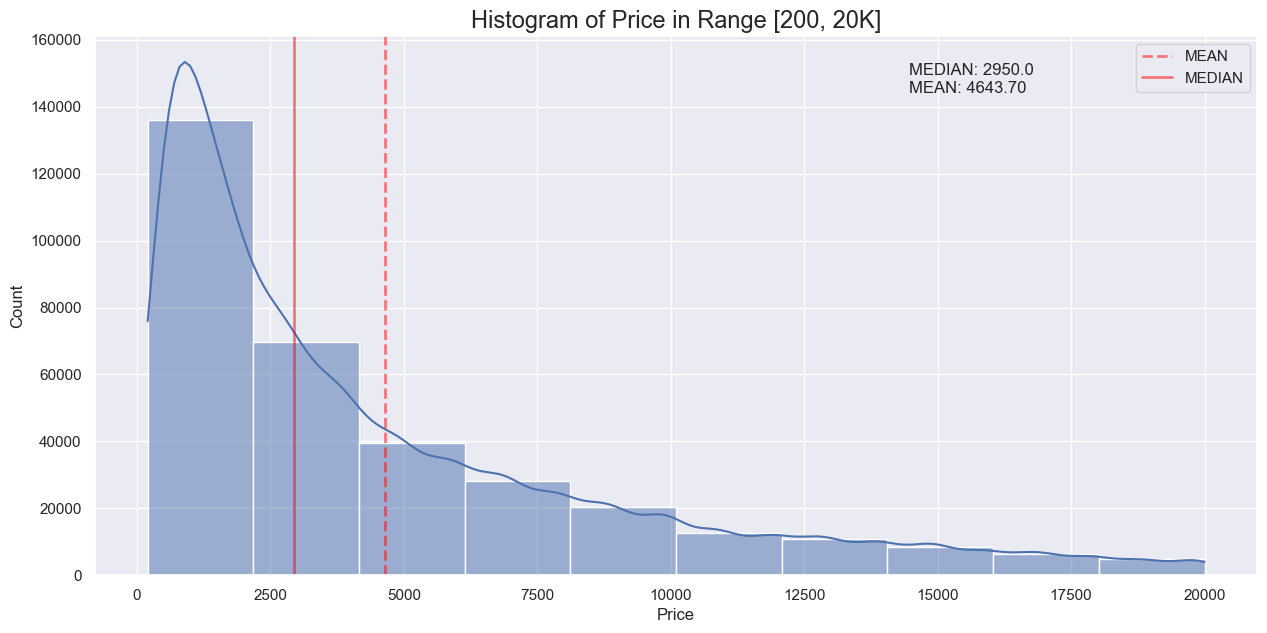

In [19]:
fig, ax = plt.subplots(figsize=(15, 7))

price_20 = df.loc[df['price'].between(200, 20_000), 'price']

# Гистограмма
sns.histplot(data=price_20, bins=10, kde=True, ax=ax)
ax.set_title('Histogram of Price in Range [200, 20K]', fontsize=17)
ax.set_xlabel('Price')
ax.axvline(price_20.mean(), color='red', linestyle='dashed', linewidth=2, label='MEAN', alpha=.5)
ax.axvline(price_20.median(), color='red', linestyle='solid', linewidth=2, label='MEDIAN', alpha=.5)
ax.legend()
txt = f'MEDIAN: {price_20.median()}\nMEAN: {price_20.mean():.2f}'
ax.text(0.7, 0.95, txt, transform=ax.transAxes, verticalalignment='top');



##### yearOfRegistration

In [20]:
print(f"yearOfRegistration > 2025: {len(df[df['yearOfRegistration'] > 2025])}")
print(f"yearOfRegistration < 1950: {len(df[df['yearOfRegistration'] < 1950])}")

print(f"Mean: {df['yearOfRegistration'].mean():.2f}, Median: {df['yearOfRegistration'].median()}")
print(f"Min: {df['yearOfRegistration'].min()}, Max: {df['yearOfRegistration'].max()}")

yearOfRegistration > 2025: 114
yearOfRegistration < 1950: 289
Mean: 2004.58, Median: 2003.0
Min: 1000, Max: 9999


In [21]:
df['yearOfRegistration'].quantile(.99)
df['yearOfRegistration'].quantile(.01)

np.float64(2018.0)

np.float64(1978.0)

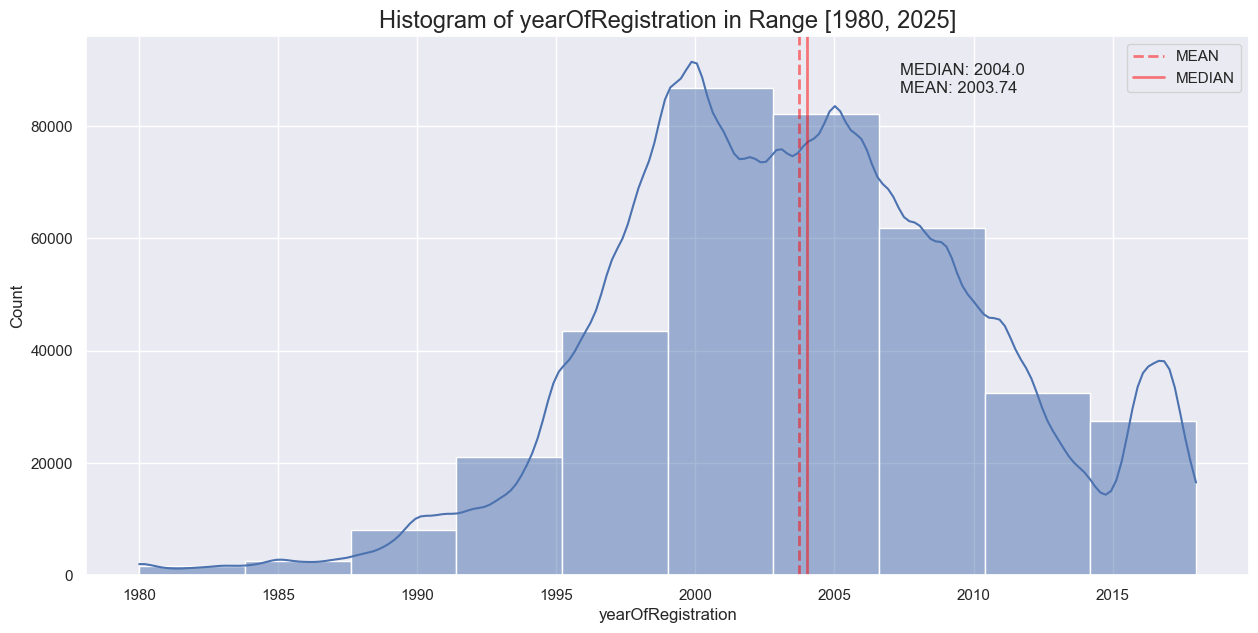

In [22]:
fig, ax = plt.subplots(figsize=(15, 7))

year = df.loc[df['yearOfRegistration'].between(1980, 2018), 'yearOfRegistration']

# Гистограмма
sns.histplot(data=year, bins=10, kde=True, ax=ax)
ax.set_title('Histogram of yearOfRegistration in Range [1980, 2025]', fontsize=17)
ax.set_xlabel('yearOfRegistration')
ax.axvline(year.mean(), color='red', linestyle='dashed', linewidth=2, label='MEAN', alpha=.5)
ax.axvline(year.median(), color='red', linestyle='solid', linewidth=2, label='MEDIAN', alpha=.5)
ax.legend()
txt = f'MEDIAN: {year.median()}\nMEAN: {year.mean():.2f}'
ax.text(0.7, 0.95, txt, transform=ax.transAxes, verticalalignment='top');

##### PowerPS

In [23]:
print(f"powerPS > 350: {len(df[df['powerPS'] > 350])}")
print(f"powerPS < 1: {len(df[df['powerPS'] < 1])}")

print(f"Mean: {df['powerPS'].mean():.2f}, Median: {df['powerPS'].median()}")
print(f"Min: {df['powerPS'].min()}, Max: {df['powerPS'].max()}")

powerPS > 350: 3087
powerPS < 1: 40820
Mean: 115.55, Median: 105.0
Min: 0, Max: 20000


In [24]:
df['powerPS'].quantile(.99)
df['powerPS'].quantile(.1)

np.float64(340.0)

np.float64(0.0)

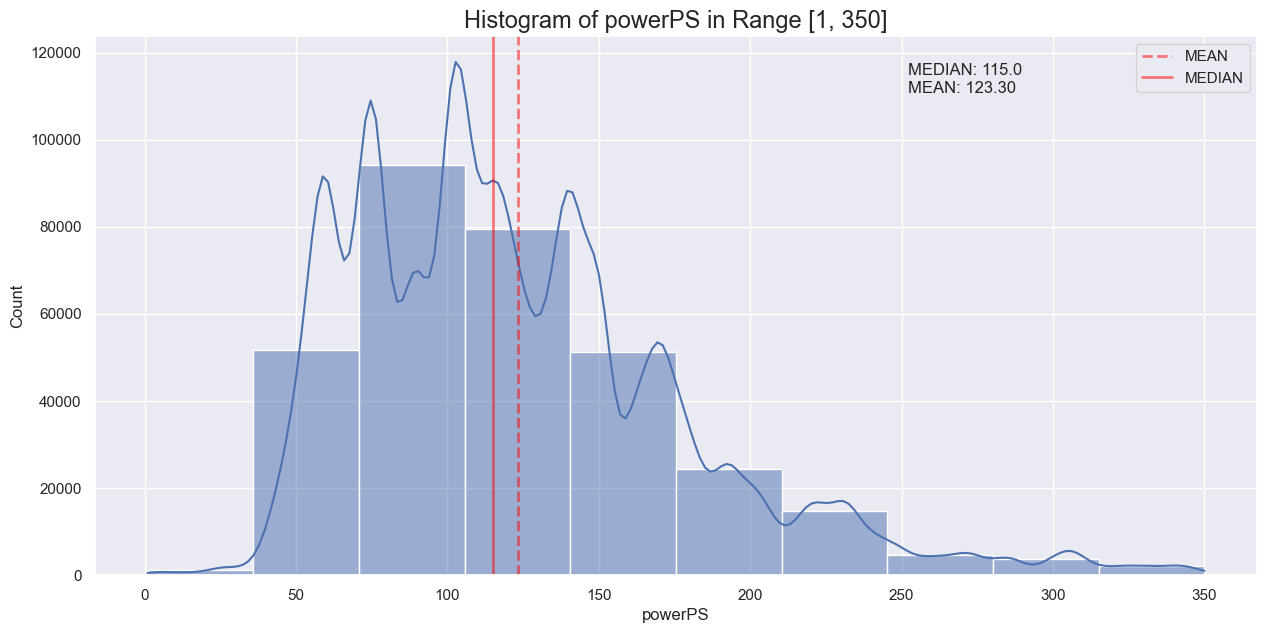

In [25]:
fig, ax = plt.subplots(figsize=(15, 7))

power = df.loc[df['powerPS'].between(1, 350), 'powerPS']

# Гистограмма
sns.histplot(data=power, bins=10, kde=True, ax=ax)
ax.set_title('Histogram of powerPS in Range [1, 350]', fontsize=17)
ax.set_xlabel('powerPS')
ax.axvline(power.mean(), color='red', linestyle='dashed', linewidth=2, label='MEAN', alpha=.5)
ax.axvline(power.median(), color='red', linestyle='solid', linewidth=2, label='MEDIAN', alpha=.5)
ax.legend()
txt = f'MEDIAN: {power.median()}\nMEAN: {power.mean():.2f}'
ax.text(0.7, 0.95, txt, transform=ax.transAxes, verticalalignment='top');

##### Kilometer

In [26]:
df['kilometer'].quantile(.95)
df['kilometer'].quantile(.05)

np.float64(150000.0)

np.float64(30000.0)

In [27]:
print(f"kilometer > 150K: {len(df[df['kilometer'] >= 150_000])}")
print(f"kilometer < 5K: {len(df[df['kilometer'] <= 5_000.0])}")

print(f"Mean: {df['kilometer'].mean():.2f}, Median: {df['kilometer'].median()}")
print(f"Min: {df['kilometer'].min()}, Max: {df['kilometer'].max()}")

kilometer > 150K: 240795
kilometer < 5K: 7069
Mean: 125618.84, Median: 150000.0
Min: 5000, Max: 150000


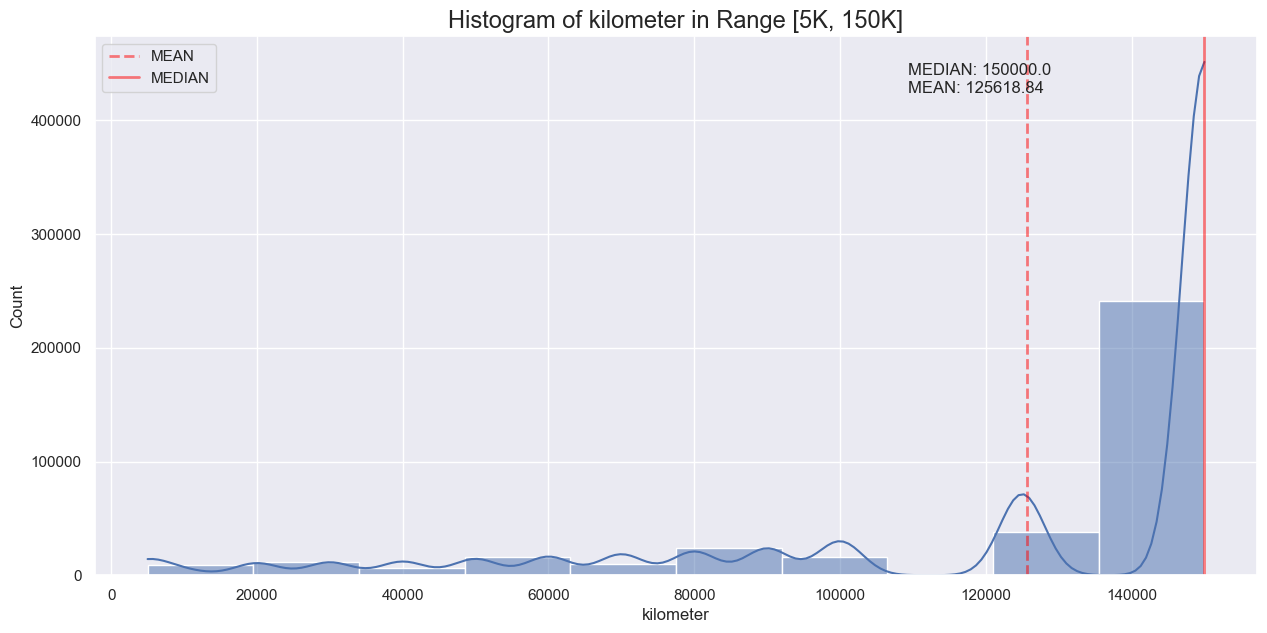

In [28]:
fig, ax = plt.subplots(figsize=(15, 7))

power = df.loc[df['kilometer'].between(5_000, 150_000), 'kilometer']

# Гистограмма
sns.histplot(data=power, bins=10, kde=True, ax=ax)
ax.set_title('Histogram of kilometer in Range [5K, 150K]', fontsize=17)
ax.set_xlabel('kilometer')
ax.axvline(power.mean(), color='red', linestyle='dashed', linewidth=2, label='MEAN', alpha=.5)
ax.axvline(power.median(), color='red', linestyle='solid', linewidth=2, label='MEDIAN', alpha=.5)
ax.legend()
txt = f'MEDIAN: {power.median()}\nMEAN: {power.mean():.2f}'
ax.text(0.7, 0.95, txt, transform=ax.transAxes, verticalalignment='top');

Оставим машины:
-  `price` между 200 и 20К;
- `yearOfRegistration` между 1980 и 2018 
- `powerPS` между 1 и 350

In [29]:
df = df[df['price'].between(200, 20_000)]
df = df[df['yearOfRegistration'].between(1980, 2018)]
df = df[df['powerPS'].between(1, 350)]

In [30]:
df.shape

(299948, 14)

##### Categorical features

<Axes: title={'center': 'No. of Cars by Gearbox'}, xlabel='Gearbox Type', ylabel='Count'>

<Axes: title={'center': 'No. of Cars by Fuel Type'}, xlabel='Fuel Type', ylabel='Count'>

<Axes: title={'center': 'Repaired/Damaged?'}, xlabel='Repaired/Damaged', ylabel='Count'>

<Axes: title={'center': 'No. of Cars by ABtest'}, xlabel='ABtest', ylabel='Count'>

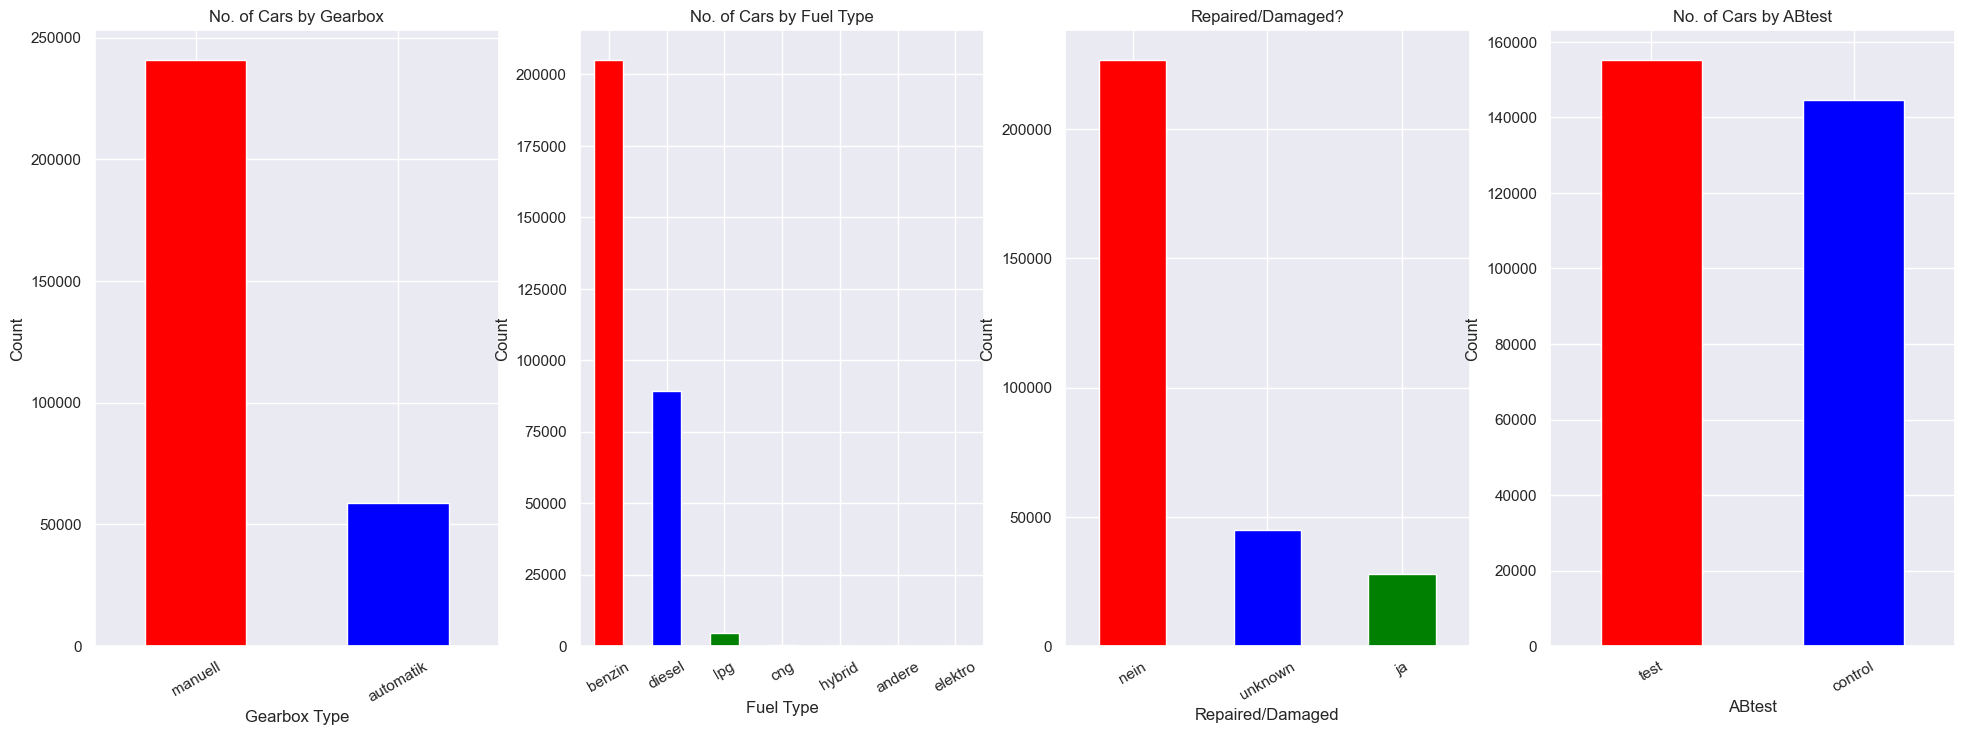

In [31]:
ig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24, 8))

df['gearbox'].value_counts().plot(kind='bar', ax=axes[0], color=['red', 'blue'], title='No. of Cars by Gearbox', xlabel='Gearbox Type', ylabel='Count', rot=30, grid=True)
df['fuelType'].value_counts().plot(kind='bar', ax=axes[1], color=['red', 'blue', 'green', 'purple'], title='No. of Cars by Fuel Type', xlabel='Fuel Type', ylabel='Count', rot=30, grid=True)
df['notRepairedDamage'].value_counts().plot(kind='bar', ax=axes[2], color=['red', 'blue', 'green'], title='Repaired/Damaged?', xlabel='Repaired/Damaged', ylabel='Count', rot=30, grid=True)
df['abtest'].value_counts().plot(kind='bar', ax=axes[3], color=['red', 'blue'], title='No. of Cars by ABtest', xlabel='ABtest', ylabel='Count', rot=30, grid=True)

Следует удалить cng, hybrid, andere, elektro 

In [32]:
values_to_remove = ['cng', 'hybrid', 'andere', 'elektro']

df = df[~df['fuelType'].isin(values_to_remove)]

In [33]:
X = df.drop('price', axis=1)
y = df['price']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,vehicleMissed,gearboxMissed,fuelMissed
205574,test,limousine,2000,manuell,105,3er,150000,benzin,bmw,nein,False,False,False
333518,test,kombi,2007,manuell,102,a3,20000,benzin,audi,unknown,False,False,False
212661,test,cabrio,2000,manuell,200,golf,150000,benzin,volkswagen,nein,False,False,False
307341,control,bus,2011,manuell,64,unknown,70000,diesel,sonstige_autos,ja,False,False,False
186024,control,kleinwagen,1999,manuell,75,civic,100000,benzin,honda,nein,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148952,control,kombi,1998,manuell,150,a6,150000,diesel,audi,nein,False,False,False
321915,test,kleinwagen,2003,manuell,50,arosa,150000,benzin,seat,nein,False,False,False
164014,control,suv,2001,manuell,205,andere,150000,benzin,opel,nein,False,False,False
182549,test,bus,2012,automatik,136,b_klasse,150000,diesel,mercedes_benz,nein,False,False,False


# 1. Linear Model

In [36]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

In [ ]:
numeric = X_train.select_dtypes(np.number).columns
categorical = X_train.select_dtypes(exclude=np.number).columns

In [ ]:
linear_column_transformer = ColumnTransformer([
    ('kbins', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile'), ['yearOfRegistration']),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline(steps=[
    ('ohe', linear_column_transformer),
    ('regression', Ridge())
])

In [ ]:
# Определяем сетку параметров для поиска
param_grid = {
    'regression__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],  # Возможные значения alpha для Ridge
}

# Создаем GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,                    
    scoring='r2',           
    n_jobs=-1,              
    verbose=2               
)

grid_search.fit(X_train, y_train)

print("\nЛучшие параметры:", grid_search.best_params_)
print("Лучший R2 score на кросс-валидации:", grid_search.best_score_)

y_pred = grid_search.predict(X_test)

print('\nРезультаты на тестовом наборе:')
print('R2 score:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ohe',
                                        ColumnTransformer(transformers=[('kbins',
                                                                         KBinsDiscretizer(encode='ordinal',
                                                                                          n_bins=10),
                                                                         ['yearOfRegistration']),
                                                                        ('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand',
       'notRepairedDamage', 'vehicleMissed', 'gearboxMissed', 'fuelMissed'],
      dtype='object')),
                                                                        ('scaling',
                                                                         StandardScaler(),
                                                                         Index(['yearOfRegistration', 'powerPS', 'kilometer'], dtype='object'))])),
                                       ('regression', Ridge())]),
             n_jobs=-1,
             param_grid={'regression__alpha': [0.001, 0.01, 0.1, 1.0, 10.0,
                                               100.0]},
             scoring='r2', verbose=2)


Лучшие параметры: {'regression__alpha': 1.0}
Лучший R2 score на кросс-валидации: 0.7414198457339929

Результаты на тестовом наборе:
R2 score: 0.7426790261919307
MSE: 5340494.74882937
RMSE: 2310.9510485575784


# 2. Decision Tree

# 3. Random Forest